In [1]:
# !pip install torch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import LabelEncoder

from tqdm.auto import tqdm

np.random.seed(12345)
torch.manual_seed(123)

# ========== Data ==========

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
data

,x1,x2,y
0,0,4,A
1,2,2,B
2,2,4,A
3,1,4,A
4,-1,3,A
5,0,2,A
6,3,1,B
7,-3,1,C
8,3,3,B
9,1,-2,C


In [5]:
X = data[['x1', 'x2']].to_numpy()

In [6]:
y = data['y'].to_numpy()

In [7]:
le = LabelEncoder()
y_le = le.fit_transform(y)

# ========== Model ==========

In [8]:
X = torch.from_numpy(X).float()
y_le = torch.from_numpy(y_le).long()

In [9]:
layers = []

layers.append(nn.Linear(X.shape[1], 5))
layers.append(nn.ReLU())

layers.append(nn.Linear(5, 4))
layers.append(nn.ReLU())

layers.append(nn.Linear(4, 3))

model = nn.Sequential(*layers)

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=1)
loss_function = nn.CrossEntropyLoss()

In [11]:
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [12]:
loss_history = []

for i in tqdm(range(500)):
    model.train()
    optimizer.zero_grad()
    
    y_pred_softmax = model(X)
    
    loss = loss_function(y_pred_softmax, y_le)
    loss.backward()
    
    optimizer.step()

    loss_history.append(loss.item())

  0%|          | 0/500 [00:00<?, ?it/s]

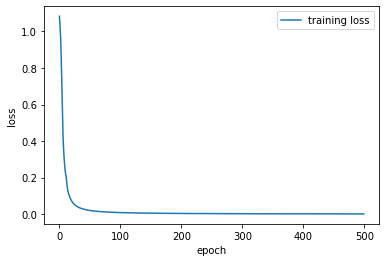

In [13]:
plt.plot(loss_history, label='training loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [14]:
for name, param in model.named_parameters():
    print(name, param)
    print()

0.weight Parameter containing:
tensor([[-0.7553, -0.0473],
        [-0.8246,  0.7235],
        [-0.9695,  1.0961],
        [-1.0478, -1.7824],
        [-0.7966,  0.9496]], requires_grad=True)

0.bias Parameter containing:
tensor([-0.0527,  0.3032, -0.3772,  1.3575, -0.2332], requires_grad=True)

2.weight Parameter containing:
tensor([[-0.0916, -0.3906,  0.2299, -0.1055,  0.0937],
        [ 0.6433,  0.1401,  0.1394,  1.8055, -0.2407],
        [ 0.4667, -0.0616,  0.4218,  1.5358, -0.3939],
        [ 0.2216,  1.0238,  1.1362,  0.0519,  1.1246]], requires_grad=True)

2.bias Parameter containing:
tensor([-0.0913, -0.0283, -0.0004, -0.2553], requires_grad=True)

4.weight Parameter containing:
tensor([[ 0.0531, -0.6245, -0.9291,  1.3807],
        [ 0.4652, -0.6700, -0.2842, -1.1703],
        [ 0.0670,  1.6073,  1.2667, -0.1565]], requires_grad=True)

4.bias Parameter containing:
tensor([-1.8512,  4.2320, -1.9612], requires_grad=True)



# ========== Prediction ==========

In [15]:
X = pd.read_csv('incoming_data.csv').to_numpy()

In [16]:
X = torch.from_numpy(X).float()

In [17]:
with torch.no_grad():
    model.eval()
    y_pred_softmax = torch.log_softmax(model(X), dim=1)
    _, y_pred_le = torch.max(y_pred_softmax, dim=1)
y_pred = le.inverse_transform(y_pred_le)

y_pred

array(['C', 'A', 'B', 'A'], dtype=object)